In [1]:
#helps notebooks to automatically update when you change the source code of the modeules
%load_ext autoreload
%autoreload 2

#show plots inside the notebook
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
df_raw = pd.read_csv('train.csv', low_memory=False, parse_dates=["survey_date"])

In [4]:
add_datepart(df_raw, 'survey_date')

In [5]:
train_cats(df_raw)

In [6]:
df, y, nas = proc_df(df_raw, 'depressed')

In [7]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 287  # same as competition's test set size
n_trn = len(df)-n_valid
#raw_tain consists of the first n-12000 rows and raw_valid contains the last 12,000 rows for the validation set
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((856, 109), (856,), (287, 109))

In [8]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [9]:
m = RandomForestClassifier(n_estimators=70, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0, 0.3733266964732787, 1.0, 0.8606271777003485, 0.8189252336448598]


In [11]:
m.feature_importances_

array([0.04364, 0.04409, 0.00579, 0.05117, 0.01196, 0.02611, 0.02492, 0.03784, 0.00688, 0.00854, 0.01372,
       0.01467, 0.01741, 0.01106, 0.00874, 0.00854, 0.     , 0.0153 , 0.01471, 0.00404, 0.00515, 0.00997,
       0.00746, 0.01267, 0.0214 , 0.01487, 0.00298, 0.00145, 0.0017 , 0.00334, 0.00036, 0.0074 , 0.00327,
       0.01344, 0.02014, 0.01233, 0.01332, 0.00541, 0.01483, 0.00412, 0.007  , 0.00712, 0.00181, 0.00178,
       0.01617, 0.01006, 0.01422, 0.01129, 0.00822, 0.00503, 0.01292, 0.00451, 0.     , 0.     , 0.00079,
       0.01499, 0.01413, 0.00746, 0.00984, 0.00891, 0.00319, 0.     , 0.01679, 0.01328, 0.00065, 0.00076,
       0.00382, 0.00786, 0.00853, 0.00654, 0.00244, 0.00279, 0.0221 , 0.00223, 0.00974, 0.02422, 0.03269,
       0.02092, 0.03875, 0.00391, 0.00331, 0.     , 0.0017 , 0.     , 0.     , 0.04038, 0.00073, 0.00195,
       0.00235, 0.001  , 0.00052, 0.00047, 0.00086, 0.00157, 0.00105, 0.00361, 0.00241, 0.00334, 0.00062,
       0.00151, 0.00176, 0.00045, 0.00156, 0.0

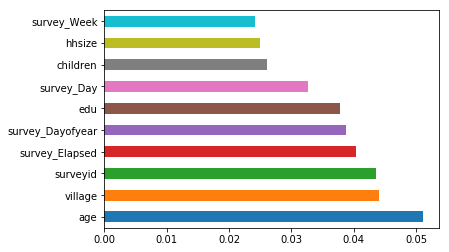

In [13]:
feat_importances = pd.Series(m.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [15]:
feat_importances.nlargest(100)

age                 0.051171
village             0.044088
surveyid            0.043641
survey_Elapsed      0.040379
survey_Dayofyear    0.038752
edu                 0.037844
survey_Day          0.032694
children            0.026113
hhsize              0.024916
survey_Week         0.024216
dtype: float64

In [18]:
df_raw.shape

(1143, 87)